In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of files and corresponding city names
files = ['city1_weather.csv', 'city2_weather.csv', 'city3_weather.csv', 'city4_weather.csv', 'city5_weather.csv']
cities = ['City1', 'City2', 'City3', 'City4', 'City5']

# Combine data from all cities into one DataFrame
dataframes = []
for file, city in zip(files, cities):
    df = pd.read_csv(file)
    df['city'] = city  # Add a city column
    dataframes.append(df)

# Concatenate all DataFrames
combined_data = pd.concat(dataframes, ignore_index=True)

# Convert 'date' column to datetime
combined_data['date'] = pd.to_datetime(combined_data['date'])

# Handle missing data (example: fill missing values with 0 or drop rows)
combined_data.fillna(0, inplace=True)


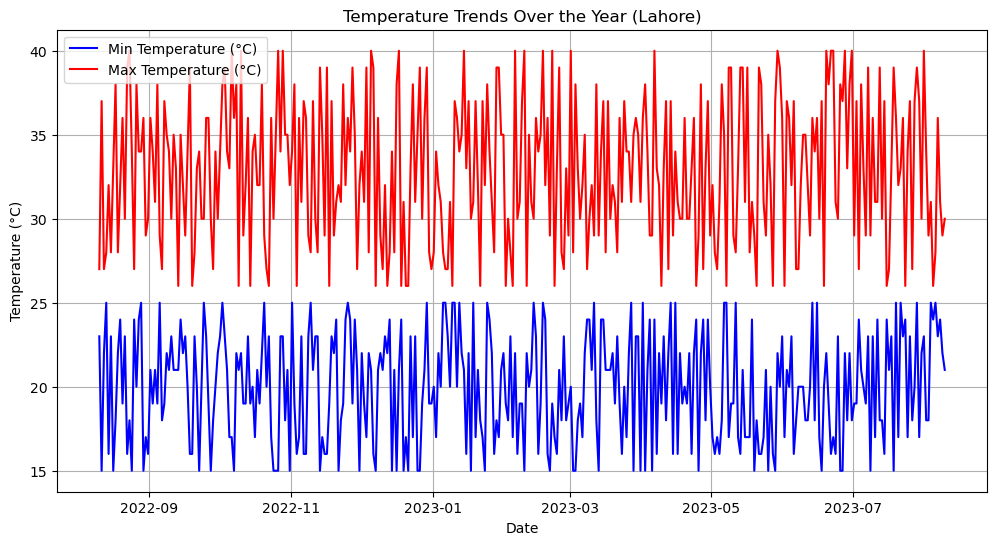

In [2]:
# Plot temperature trends
plt.figure(figsize=(12, 6))
plt.plot(weather_data['Date'], weather_data['Min_Temperature'], label="Min Temperature (°C)", color="blue")
plt.plot(weather_data['Date'], weather_data['Max_Temperature'], label="Max Temperature (°C)", color="red")
plt.title("Temperature Trends Over the Year (Lahore)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

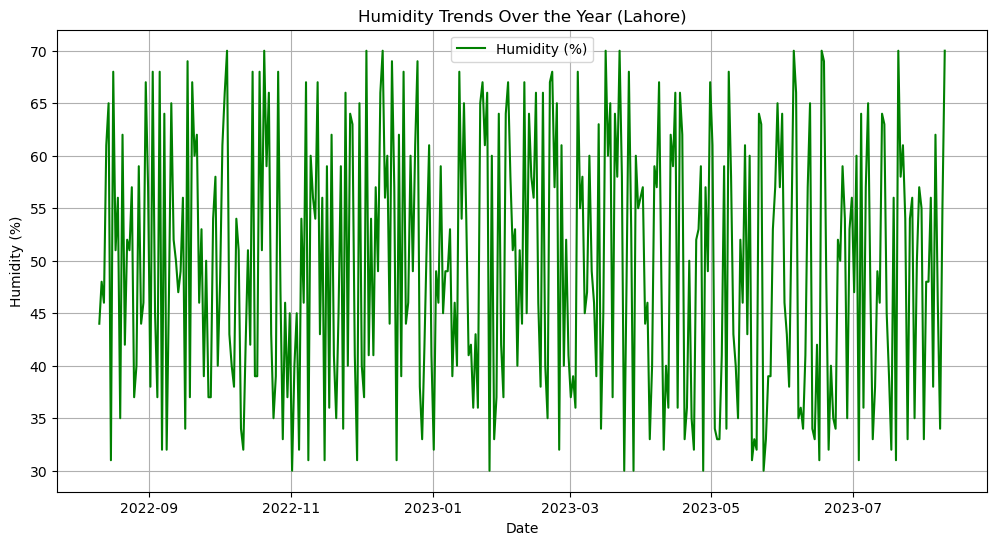

In [3]:
# Plot humidity trends
plt.figure(figsize=(12, 6))
plt.plot(weather_data['Date'], weather_data['Humidity'], label="Humidity (%)", color="green")
plt.title("Humidity Trends Over the Year (Lahore)")
plt.xlabel("Date")
plt.ylabel("Humidity (%)")
plt.legend()
plt.grid(True)
plt.show()

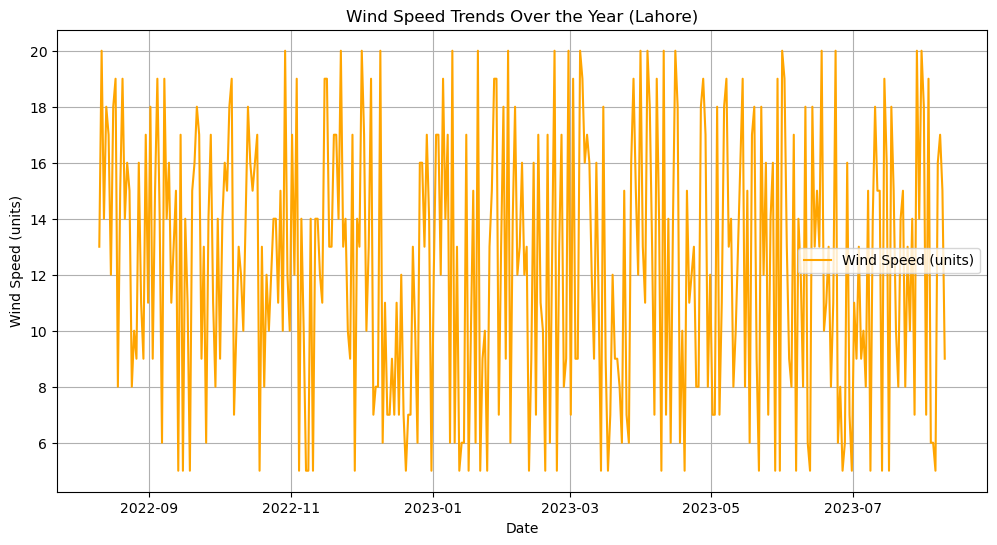

In [4]:
# Plot wind speed trends
plt.figure(figsize=(12, 6))
plt.plot(weather_data['Date'], weather_data['Wind_Speed'], label="Wind Speed (units)", color="orange")
plt.title("Wind Speed Trends Over the Year (Lahore)")
plt.xlabel("Date")
plt.ylabel("Wind Speed (units)")
plt.legend()
plt.grid(True)
plt.show()

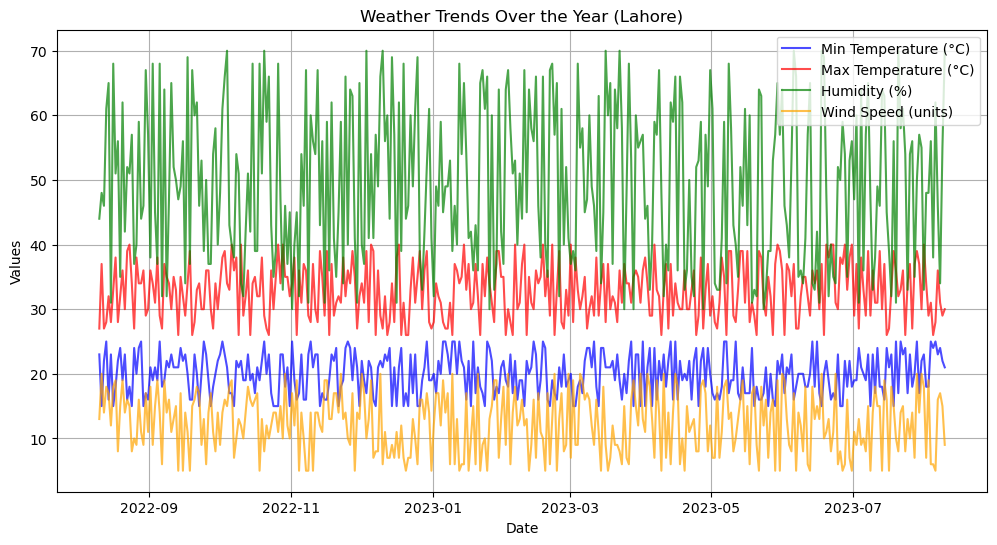

In [5]:
# Combined visualization
plt.figure(figsize=(12, 6))
plt.plot(weather_data['Date'], weather_data['Min_Temperature'], label="Min Temperature (°C)", color="blue", alpha=0.7)
plt.plot(weather_data['Date'], weather_data['Max_Temperature'], label="Max Temperature (°C)", color="red", alpha=0.7)
plt.plot(weather_data['Date'], weather_data['Humidity'], label="Humidity (%)", color="green", alpha=0.7)
plt.plot(weather_data['Date'], weather_data['Wind_Speed'], label="Wind Speed (units)", color="orange", alpha=0.7)
plt.title("Weather Trends Over the Year (Lahore)")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()
